In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Spotify_Youtube.csv')
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

In [5]:
# Filling missing values for numerical columns with mean (Sayısal sütunlardaki eksik değerlerin ortalamayla doldurulması)
numerical_cols=['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
df[numerical_cols]=df[numerical_cols].apply(lambda x: x.fillna(x.mean), axis=0)

In [6]:
# Filling missing values for categorical columns with a placeholder 
# (Kategorik sütunların eksik değerlerini 'No Data' ile doldurma)
categorical_cols=['Url_youtube', 'Title', 'Channel', 'Description', 'Licensed', 'official_video']
df[categorical_cols]=df[categorical_cols].fillna('No Data')

In [7]:
# Convert columns to appropriate data types (Sütunları uygun veri türlerine dönüştürme)
df[numerical_cols]=df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df[categorical_cols]=df[categorical_cols].astype('category')

In [8]:
# Remove duplicate rows (Yinelenen satırları kaldırma)
df.drop_duplicates (inplace=True)

In [9]:
# Outliers detection and removal for numerical columns (Sayısal sütunlar için aykırı değerlerin tespiti ve kaldırılması) 
for col in numerical_cols:
    df=df[(np.abs(df[col]-df[col].mean()) / df[col].std())<3]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16169 entries, 1 to 20716
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Artist            16169 non-null  object  
 1   Url_spotify       16169 non-null  object  
 2   Track             16169 non-null  object  
 3   Album             16169 non-null  object  
 4   Album_type        16169 non-null  object  
 5   Uri               16169 non-null  object  
 6   Danceability      16169 non-null  float64 
 7   Energy            16169 non-null  float64 
 8   Key               16169 non-null  float64 
 9   Loudness          16169 non-null  float64 
 10  Speechiness       16169 non-null  float64 
 11  Acousticness      16169 non-null  float64 
 12  Instrumentalness  16169 non-null  float64 
 13  Liveness          16169 non-null  float64 
 14  Valence           16169 non-null  float64 
 15  Tempo             16169 non-null  float64 
 16  Duration_ms       1616

# 1.What is the distribution of track danceability scores?
# (Pistte dans edilebilirlik puanlarının dağılımı nedir?)

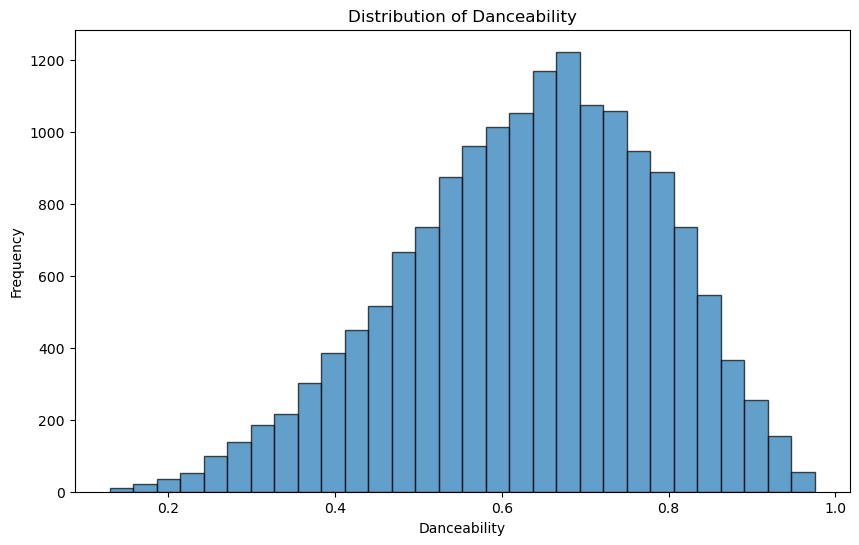

In [11]:
plt.figure(figsize=(10,6))
plt.hist(df['Danceability'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

In [51]:
# Veri setindeki bilgilere göre pistte dans edilebilirlik puanı 0.6 - 0.8 arasında yoğunlaşmıştır. 
# Genel Dağılım: Şarkıların dans edilebilirlik puanları geniş bir yelpazeye yayılmıştır, 
# ancak dağılımın büyük kısmı orta-yüksek seviyelerde yoğunlaşmaktadır. 
# Bu da, çoğu şarkının dans etmeye uygun olduğunu gösteriyor. Ortalama dans edilebilirlik puanı yaklaşık 0.7 civarındadır, 
# yani şarkıların çoğu dans edilebilir özellikler taşıyor.

# 2. What is the average energy level of tracks by each artist?
# (Her sanatçının parçalarının ortalama enerji düzeyi nedir?)

In [12]:
artist_energy=df.groupby('Artist')['Energy'].mean().sort_values(ascending=False)
artist_energy.head(10)

Artist
Ocean Sounds         0.989000
Slayer               0.987000
Metallica            0.980000
Toby Fox             0.978000
Lamb of God          0.973889
Killswitch Engage    0.968375
Kordhell             0.964444
In Flames            0.961500
The Prodigy          0.960750
Disturbed            0.960556
Name: Energy, dtype: float64

In [52]:
# Enerji düzeyi ortalaması en yüksek olan ilk 10 sanatçı listelenmiştir. Ocean Sounds’un şarkılarının büyük 
# çoğunluğunun yüksek tempolu ve enerji dolu olduğunu gösteriyor.Devamında ise metal grupları görmekteyiz
# Slayer, Metallica, Lamb of God, Killswitch Engage, In Flames ve Disturbed gibi metal grupları da enerji 
# düzeyleri açısından oldukça yüksek değerlere sahip. 
# Bu grupların müziklerinde genellikle hızlı ritimler, yüksek ses seviyesi ve güçlü gitar riff'leri bulunur. 
# Bu da enerjik bir dinleyici deneyimi sunar. 

# 3. How do views on YouTube correlate with the energy level of tracks?
# (YouTube'daki görüntülemeler parçaların enerji düzeyiyle nasıl ilişkilidir?)

In [13]:
correlation_energy_views=df['Energy'].corr(df['Views'])
print(f'Correlation between Energy and Views:{correlation_energy_views}')

Correlation between Energy and Views:0.054643831635073026


In [53]:
# 0.0546 değeri, çok zayıf bir pozitif korelasyon olduğunu gösteriyor. Bu, şarkıların enerji düzeyi arttıkça 
# görüntüleme sayısının çok hafif bir artış eğiliminde olduğunu, ancak yüksek bir ilişki olmadığını ifade edebiliriz.
# Aşağıdaki soruguda enerji düzeyi ile görüntülenmeler arasındaki ilişkiyi görselleştirdim.

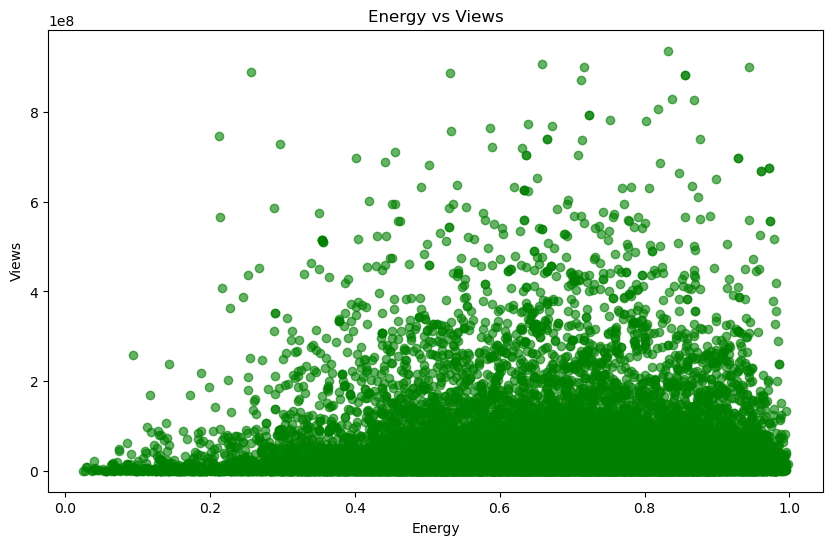

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df.Energy,df.Views,color='green',alpha=0.6)
plt.title('Energy vs Views')
plt.xlabel('Energy')
plt.ylabel('Views')
plt.show()

# 4. What is the distribution of track durations?
# (Parça sürelerinin dağılımı nedir?)

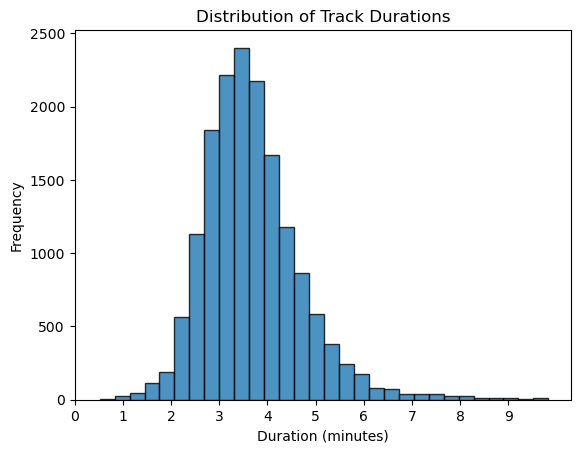

In [15]:
df['Duration_min']=df['Duration_ms']/60000
plt.hist(df['Duration_min'], bins=30, edgecolor='k', alpha=0.8)
plt.xticks(np.arange(0,10,1))  
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [54]:
# Yukarıdaki sorguda öncelikle milisaniye cinsinden verilen parça sürelerini dakika cinsine çevirdim. 
# Parça sürelerinin çoğunlukla 2 ile 4 dakika arasında yoğunlaştığı gözlemliyoruz. Bu, müzik 
# dinleyicilerinin alışkanlıklarına uygun olup, şarkıların ticari başarısı açısından ideal süre aralıklarıdır. 
# Hem kısa hem de uzun şarkılar daha spesifik dinleyici kitlelerine hitap etse de, genel olarak 3-4 dakikalık 
# şarkılar daha yaygın ve popüler müzik için standarttır.

# 5. Which albums have the highest average loudness?
#  (Hangi albümler en yüksek ortalama ses yüksekliğine sahip?)

In [26]:
album_loudness=df.groupby('Album')['Loudness'].mean().sort_values(ascending=False)
print(album_loudness.head(10))

Album
Me Gusta Estar Contigo                                                                        0.2575
Welcome to the Party (with French Montana & Lil Pump, feat. Zhavia Ward) [from Deadpool 2]    0.1750
Everytime We Touch (Fallen Superhero Remix)                                                   0.0060
PSYCHX                                                                                       -0.1420
O Saki Saki (From "Batla House")                                                             -0.1550
Tesouro de Pirata (Onda Onda)                                                                -0.5770
Latina                                                                                       -0.7390
Kyougen                                                                                      -0.7530
Só Você                                                                                      -0.7870
Namora Aí                                                                            

In [55]:
# Yukarıdaki sorguda Genel Dağılım: Albümlerin ses yüksekliği değerleri 0.2575 ile -0.8450 arasında değişmektedir. 
# Genellikle daha yüksek sesli albümler, enerji dolu veya dinamik parçalara sahipken, düşük sesli albümler daha yumuşak 
# ve sakin parçalardan oluşabilir.Bu ses yüksekliği farkları, albümlerin müzikal tarzlarıyla ve hedefledikleri dinleyici 
# kitlesiyle de ilişkili olabilir.

# 6. What are the most common keys of tracks in the dataset?
# (Veri kümesindeki parçaların en yaygın anahtarları nelerdir?)

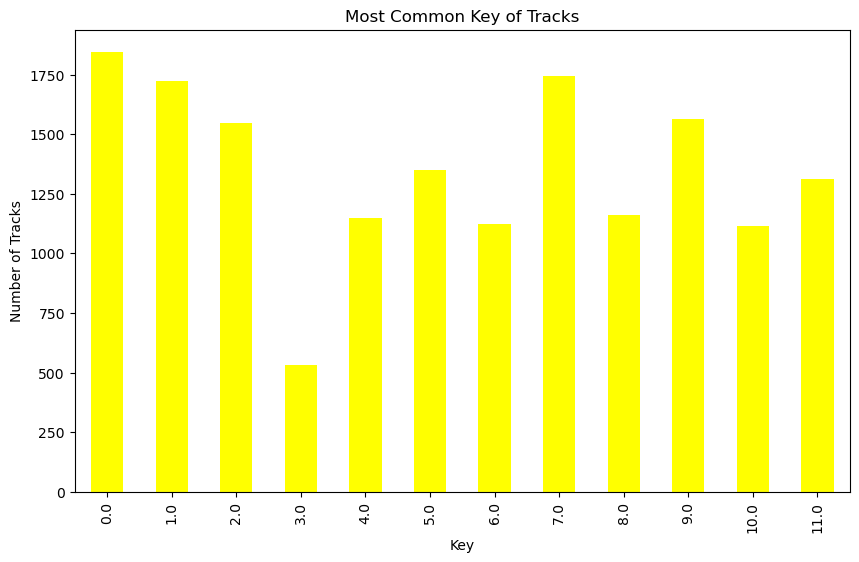

In [33]:
common_keys=df['Key'].value_counts().sort_index()
common_keys.plot(kind='bar', color='yellow', figsize=(10,6))
plt.title('Most Common Key of Tracks')
plt.xlabel('Key')
plt.ylabel('Number of Tracks')
plt.show()

In [58]:
# Yukarıdaki tabloyu incelediğimizde En yaygın anahtarlardan biri 0.0 anahtarı (muhtemelen C Majör veya A Minör)
# veri setindeki en yaygın anahtardır. Bu anahtar genellikle popüler müzikte sıkça kullanılıyor, çünkü çalması ve söylemesi 
# kolay. 7.0 anahtarı (muhtemelen G Majör veya E Minör), ikinci en yaygın anahtar. Bu da müzikte çok 
# sık kullanılan bir başka yaygın tonaliteyi işaret ediyor.Veri setindeki en yaygın anahtarlar 0.0 (C Majör/A Minör) ve 
# 7.0 (G Majör/E Minör) olarak dikkat çekmektedir. Bu anahtarlar, müzikal çeşitlilik sunmasına rağmen, popüler müzikte daha 
# sık kullanılan tonlardır. Daha az yaygın anahtarlar, genellikle daha spesifik veya niş müzik türlerine hitap ediyor olabilir.

# 7. How does acousticness vary across different album types?
# (Akustiklik farklı albüm türlerine göre nasıl değişiyor?)

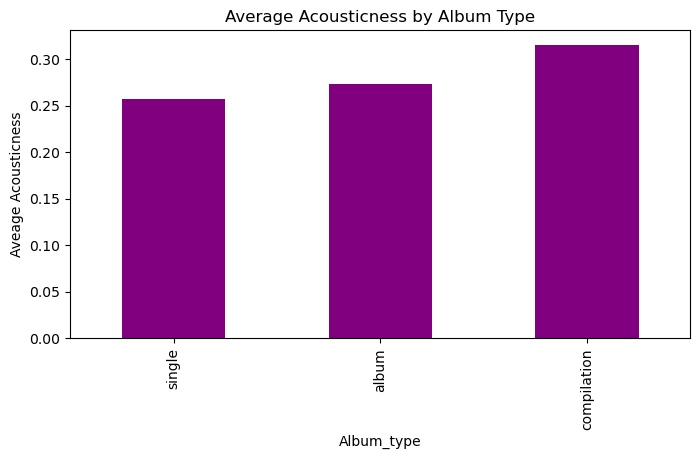

In [60]:
album_types_acousticness=df.groupby('Album_type')['Acousticness'].mean().sort_values()
album_types_acousticness.plot(kind='bar', color='purple', figsize=(8,4))
plt.title('Average Acousticness by Album Type')
plt.xlabel('Album_type')
plt.ylabel('Aveage Acousticness')
plt.show()

In [62]:
# Derleme (compilation) albümler en yüksek akustiklik skoruna sahipken, tekliler(Single) en düşük akustikliğe sahip. 
# Bu, akustik unsurların daha çok derleme(compilation) albümlerde yer aldığını, teklilerin ise daha dijital ve elektronik 
# sesler üzerine kurulu olduğunu gösteriyor. Stüdyo albümleri ise akustiklik açısından orta seviyede, hem doğal hem de dijital 
# ögeleri dengeli bir şekilde barındırabilir.

# 8. How does the number of comments relate to the popularity (views) of a video?
# (Yorum sayısının bir videonun popülerliğiyle (görüntülenmeleriyle) nasıl bir ilişkisi var?)

In [48]:
correlation_view_comments=df['Views'].corr(df.Comments)
print(correlation_view_comments)

0.7308093427099475


In [63]:
# Yorum sayısı ile görüntülenme sayısı arasında güçlü pozitif bir ilişki bulunuyor. Bu, popüler videoların 
# (daha fazla görüntülenme alan videolar) genellikle daha fazla yorum aldığını gösteriyor. Videolar izleyiciler tarafından 
# ne kadar çok izlenirse, o kadar çok kişi yorum yapmaya eğilimli, bu da videonun sosyal etkileşimlerini ve genel 
# popülerliğini artırıyor. Aşağıda da yukarıdaki sorgunun görselini belirttim.

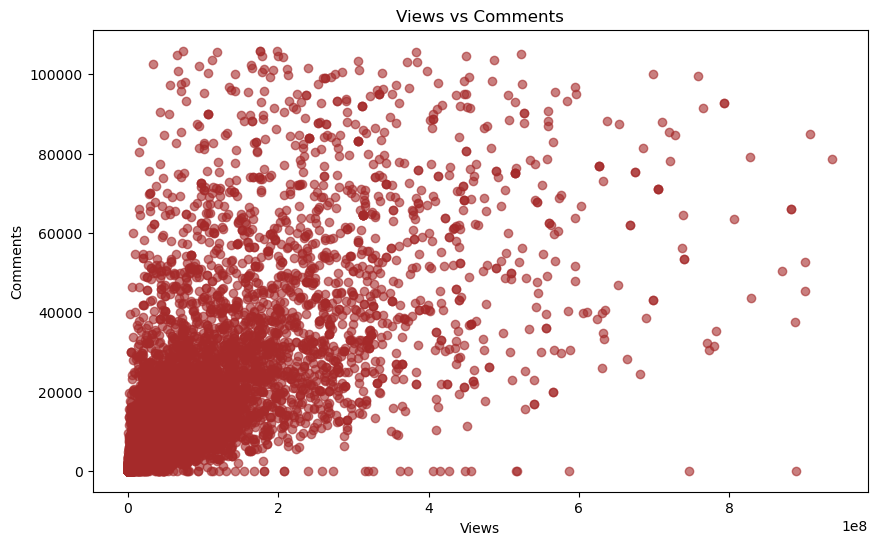

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(df['Views'],df['Comments'],color='brown', alpha=0.6)
plt.title('Views vs Comments')
plt.xlabel('Views')
plt.ylabel('Comments')
plt.show()

<Axes: >

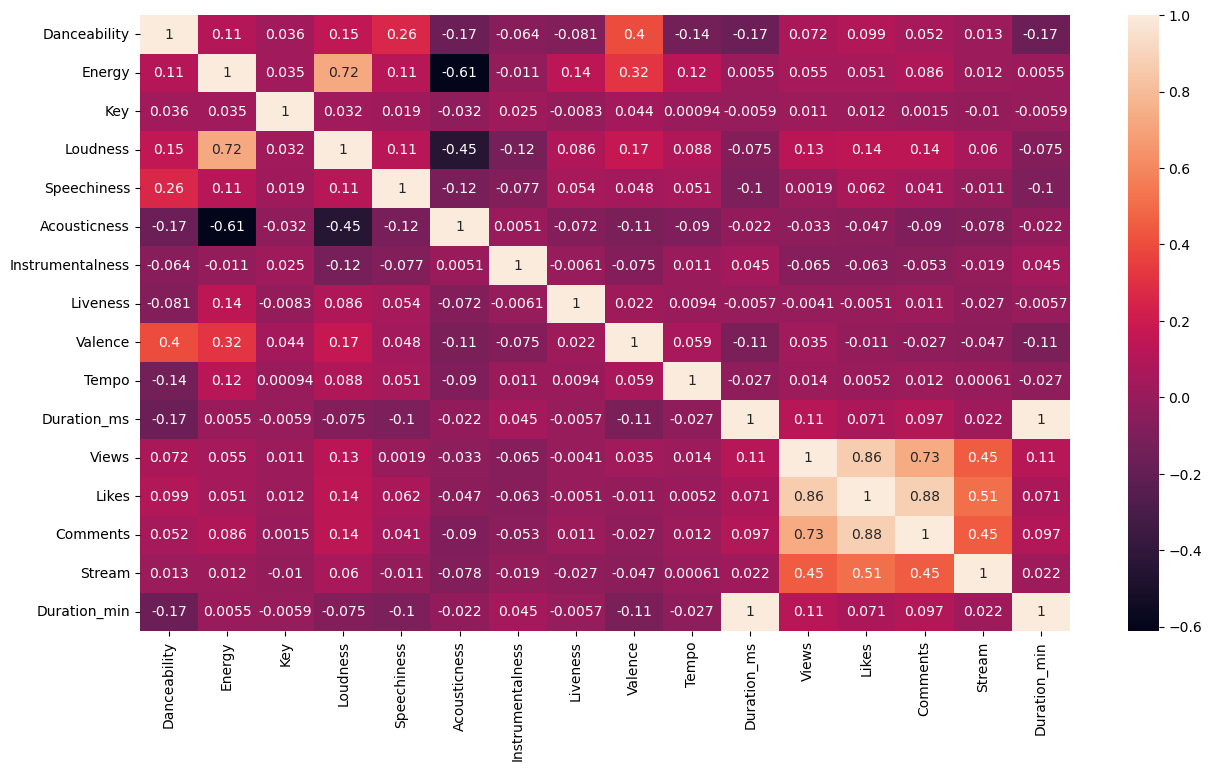

In [64]:
# Yukarıda yapmış olduğum EDA ile ilgili Genel Değerlendirme:
# Bu analizler, müzik parçalarının çeşitli özelliklerinin (süre, anahtar, akustiklik) ve etkileşimlerin (yorum sayısı) 
# popülerlik ve dinleyici tercihlerindeki etkilerini anlamamıza yardımcı oldu. Şarkıların ve albümlerin hangi özelliklerinin 
# daha popüler olduğunu ve hangi özelliklerin dinleyici katılımını artırdığını belirlemek, müzik prodüksiyonu ve pazarlaması 
# için önemli bilgiler sunar. Özellikle, popüler müzik trendlerinin ve dinleyici eğilimlerinin analiz edilmesi, sanatçılar 
# ve yapımcılar için değerli stratejik içgörüler sağlayabilir.